Natural Language Processing

Vocalbulary. Each word placed in dictionary. And a number represents every single one. BAG OF WORDS(All numbers in one bag). But not reliable and used only for simple sentences and tasks. Like finding and frequency of appearance.

So we create Word embeddings. So It creates the word into a VECTOR which will represent it. So every word is represented with coordinates and a 3d vector.

Now if 2 vectors are close to each other, then similar words. Using the space to determine close meaning of words!

RNN:Recurrent NN - Used to process textual data and best for NLP. Processes entire data in different time steps. Not all at once. Processes one word at a time. Like humans, reading it from left to right word to word. We understand what the next word means based on the previous word. Slow read one at a time and then understand what it means.

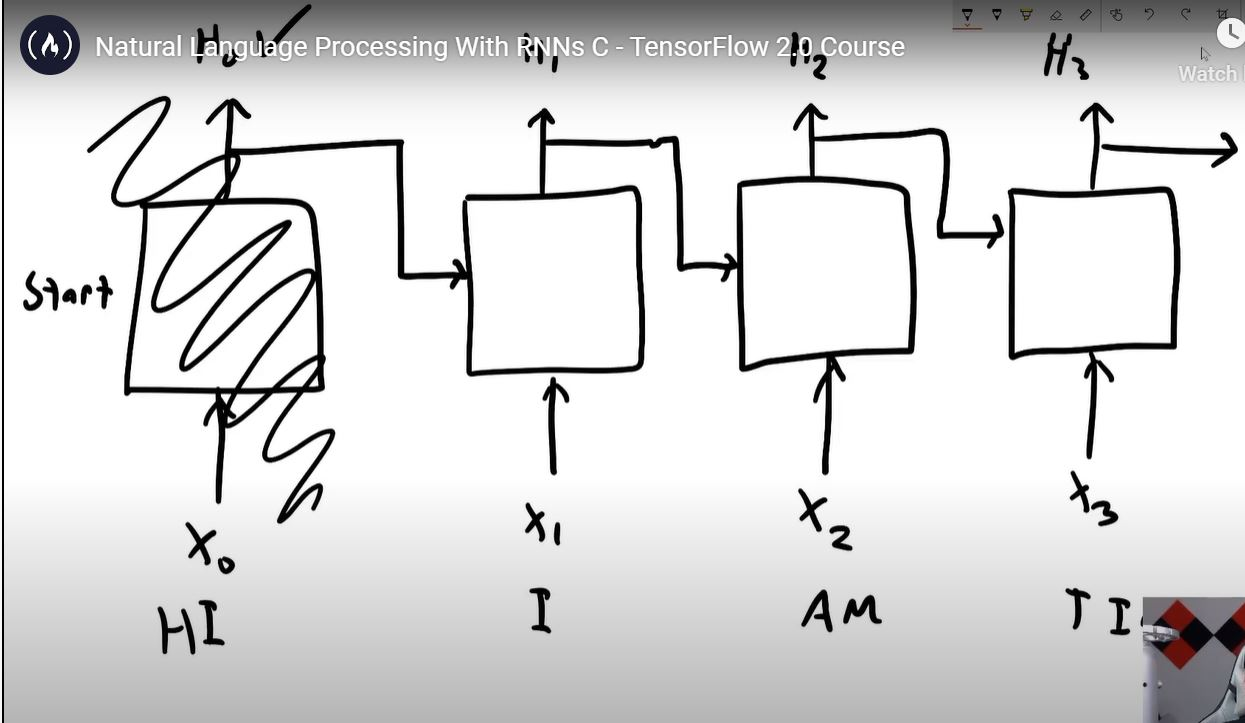

Now in simple RNN the previous ouputs are appended and sent to next. So the data might get insignificant or get lost int eh process. SO LSTM - Long Short term Memory.

So this has one more variable or entity which keeps in mind the current state unlike in the simple RNN where on the previous output was kept in mind. So now we can access an output from ANY previous stage. Just like a buffer or LOOK UP TABLE.

SENTIMENT ANALYSIS! EXAMPLE 1 ON MOVIE REVIEWS ARE POSTIVE OR NEGATIVE REVIEWS. Has label +ve or -ve. Each review is encoded with integer. So 3 means it is the 3rd most common word

In [2]:
from keras.datasets import imdb
from keras.utils import pad_sequences
import tensorflow as tf
import numpy as np
import os

VOCAB_SIZE=88584
MAXLEN=250
BATCH_SIZE=64

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=VOCAB_SIZE)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
len(train_data[10])

450

The lengths of each review is different. So padding required


In [4]:
train_data = pad_sequences(train_data, MAXLEN)
test_data = pad_sequences(test_data, MAXLEN)

In [5]:
len(train_data[1])

250

In [6]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Embedding(VOCAB_SIZE, 32),
        tf.keras.layers.LSTM(32),
        tf.keras.layers.Dense(1, activation="sigmoid")#1 classes so 1 neurons. Sigmoid!
        #Input, hidden and output layer respectively
    ]
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          2834688   
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 2,843,041
Trainable params: 2,843,041
Non-trainable params: 0
_________________________________________________________________


Why sigmoid? Because sentiment is either 0 or 1. So if closer to 1 then 1 else 0. And 32 means 32 dimensional output. This is then sent to LSTM layer

Now train! Compile

In [9]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(train_data, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 50s 77ms/step - loss: 0.3338 - acc: 0.8612 - val_loss: 0.2949 - val_acc: 0.8826
Epoch 2/10
625/625 [==============================] - 21s 34ms/step - loss: 0.2355 - acc: 0.9133 - val_loss: 0.2933 - val_acc: 0.8806
Epoch 3/10
625/625 [==============================] - 14s 22ms/step - loss: 0.1858 - acc: 0.9330 - val_loss: 0.3742 - val_acc: 0.8430
Epoch 4/10
625/625 [==============================] - 11s 17ms/step - loss: 0.1524 - acc: 0.9470 - val_loss: 0.3146 - val_acc: 0.8870
Epoch 5/10
625/625 [==============================] - 11s 17ms/step - loss: 0.1244 - acc: 0.9589 - val_loss: 0.3109 - val_acc: 0.8836
Epoch 6/10
625/625 [==============================] - 9s 14ms/step - loss: 0.1057 - acc: 0.9653 - val_loss: 0.3285 - val_acc: 0.8820
Epoch 7/10
625/625 [==============================] - 10s 15ms/step - loss: 0.0923 - acc: 0.9701 - val_loss: 0.3508 - val_acc: 0.8782
Epoch 8/10
625/625 [==============================] - 8s 13ms/s

In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=1) # Or just results = model.evaluate
print('Test accuracy: ', test_acc)

In [ ]:
predictions = model.predict(test_data)
print(predictions)

Now let us try to make predictions. So this dataset was already preprocessed. So we must do the same for every other new input we give to the model

In [ ]:
from keras.preprocessing.text import text_to_word_sequence
word_index = imdb.get_word_index() # getting the look up table mappings

def encode_text(text):
  tokens = text_to_word_sequence(text) #sequencing
  tokens = [word_index[word] if word in word_index else 0 for word in tokens]
  return pad_sequences([tokens], MAXLEN)[0] # A list of lists

text = "that movie was just amazing, so amazing"
encoded = encode_text(text)
print(encoded)

# while were at it lets make a decode function
reverse_word_index = {value: key for (key, value) in word_index.items()}

def decode_integers(integers):
    PAD = 0
    text = ""
    for num in integers:
      if num != PAD:
        text += reverse_word_index[num] + " "

    return text[:-1]
  
print(decode_integers(encoded))

# now time to make a prediction

def predict(text):
  encoded_text = encode_text(text)
  pred = np.zeros((1,250))
  pred[0] = encoded_text
  result = model.predict(pred) 
  print(result[0])

positive_review = "That movie was! really loved it and would great watch it again because it was amazingly great"
predict(positive_review)

negative_review = "that movie really sucked. I hated it and wouldn't watch it again. Was one of the worst things I've ever watched"
predict(negative_review)

RNN PLAY GENERATOR

It will take in Romeo Juliet play lines as input and then predict the next character and write an entire play

In [1]:
from keras.preprocessing import sequence
import keras
import tensorflow as tf
import os
import numpy as np

In [2]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

1115394/1115394 [==============================] - 0s 0us/step


In [3]:
# from google.colab import files
# path_to_file = list(files.upload().keys())[0]

In [4]:
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
# length of text is the number of characters in it
print ('Length of text: {} characters'.format(len(text)))

Length of text: 1115394 characters


In [5]:
print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



Now this text is not encoded. So we have to perform encoding

In [6]:
vocab = sorted(set(text))
# Creating a mapping from unique characters to indices
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

def text_to_int(text):
  return np.array([char2idx[c] for c in text])

text_as_int = text_to_int(text)

In [7]:
print(text[0:13])

First Citizen


In [8]:
print(text_as_int[:13])

[18 47 56 57 58  1 15 47 58 47 64 43 52]


So encoded. Now to decode

In [9]:
def int_to_text(ints):
  try:
    ints = ints.numpy() # It must be a numpy array else pass
  except:
    pass
  return ''.join(idx2char[ints])

print(int_to_text(text_as_int[:13]))

First Citizen


We can't send all characters at one. So we will pick a sequence of length 100 and then send it. The output for that sequence will be the word but shifted one to the right i.e input:Hell output: ello

In [10]:
# Creating a stream of characters
seq_length = 100  
examples_per_epoch = len(text)//(seq_length+1)

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

In [11]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True) # batch a sequence of length 101

In [12]:
def split_input_target(chunk):  # for the example: hello
    input_text = chunk[:-1]  # hell
    target_text = chunk[1:]  # ello
    return input_text, target_text  # hell, ello

dataset = sequences.map(split_input_target)  # we use map to apply the above function to every entry

In [13]:
for x, y in dataset.take(2):
  print("\n\nEXAMPLE\n")
  print("INPUT")
  print(int_to_text(x))
  print("\nOUTPUT")
  print(int_to_text(y))



EXAMPLE

INPUT
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You

OUTPUT
irst Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You 


EXAMPLE

INPUT
are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you 

OUTPUT
re all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you k


Now we do the training part

In [14]:
BATCH_SIZE = 64
VOCAB_SIZE = len(vocab)  # vocab is number of unique characters
EMBEDDING_DIM = 256
RNN_UNITS = 1024
BUFFER_SIZE = 10000

data = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)
print(data)

<BatchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int64, name=None), TensorSpec(shape=(64, 100), dtype=tf.int64, name=None))>


Now building model function. Same procedure

In [15]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size): # batch size 64
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.LSTM(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
  ])
  return model

model = build_model(VOCAB_SIZE,EMBEDDING_DIM, RNN_UNITS, BATCH_SIZE)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (64, None, 256)           16640     
                                                                 
 lstm (LSTM)                 (64, None, 1024)          5246976   
                                                                 
 dense (Dense)               (64, None, 65)            66625     
                                                                 
Total params: 5,330,241
Trainable params: 5,330,241
Non-trainable params: 0
_________________________________________________________________


So 64 entries that are all of length 100

In [16]:
for input_example_batch, target_example_batch in data.take(1): #EXAMPLE BATCH
  example_batch_predictions = model(input_example_batch)  # ask our model for a prediction on our first batch of training data (64 entries)
  print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")  # print out the output shape

(64, 100, 65) # (batch_size, sequence_length, vocab_size)


In [17]:
print(len(example_batch_predictions))
print(example_batch_predictions)

64
tf.Tensor(
[[[ 1.19874033e-03 -3.77261220e-03 -8.80805589e-03 ... -1.43042253e-03
   -3.87429772e-03  3.04621877e-04]
  [ 8.23359587e-05 -5.08054951e-03 -8.05156771e-03 ... -8.00969824e-03
   -9.08283144e-03  4.56063496e-03]
  [ 3.74434912e-03 -5.25748217e-03 -3.27874767e-03 ... -7.90686905e-03
   -2.39735912e-03  5.25602885e-03]
  ...
  [ 4.11947304e-03 -7.26207346e-03  5.84402215e-03 ... -5.16204536e-03
   -5.79320546e-03  3.43267713e-03]
  [ 1.66934228e-03 -3.93199595e-03  1.82711740e-03 ... -6.34318916e-03
   -2.64427904e-03  5.30348858e-04]
  [ 1.75608648e-03  1.57992647e-04  8.92553665e-03 ... -6.60113338e-03
    2.68463674e-03  2.68546096e-03]]

 [[ 2.10687099e-03 -4.95309196e-03 -3.30174179e-03 ...  9.65253683e-04
   -7.25943130e-04  3.19634099e-03]
  [ 3.20328982e-04 -4.19145403e-03 -1.93247572e-03 ...  2.26698583e-04
   -8.80992273e-04  3.19052604e-03]
  [ 6.18656538e-03 -3.18033248e-03  3.83138889e-03 ... -1.49977929e-03
   -4.61031159e-04  1.21701439e-03]
  ...
  [-1.926

In [18]:
# lets examine one prediction
pred = example_batch_predictions[0]
print(len(pred))
print(pred)
# notice this is a 2d array of length 100, where each interior array is the prediction for the next character at each time step

100
tf.Tensor(
[[ 1.1987403e-03 -3.7726122e-03 -8.8080559e-03 ... -1.4304225e-03
  -3.8742977e-03  3.0462188e-04]
 [ 8.2335959e-05 -5.0805495e-03 -8.0515677e-03 ... -8.0096982e-03
  -9.0828314e-03  4.5606350e-03]
 [ 3.7443491e-03 -5.2574822e-03 -3.2787477e-03 ... -7.9068691e-03
  -2.3973591e-03  5.2560288e-03]
 ...
 [ 4.1194730e-03 -7.2620735e-03  5.8440221e-03 ... -5.1620454e-03
  -5.7932055e-03  3.4326771e-03]
 [ 1.6693423e-03 -3.9319959e-03  1.8271174e-03 ... -6.3431892e-03
  -2.6442790e-03  5.3034886e-04]
 [ 1.7560865e-03  1.5799265e-04  8.9255366e-03 ... -6.6011334e-03
   2.6846367e-03  2.6854610e-03]], shape=(100, 65), dtype=float32)


Lenght 100, at every time step we are saving output as a prediction. Hence for one training example we get 100 outputs

In [19]:
# and finally well look at a prediction at the first timestep
time_pred = pred[0]
print(len(time_pred))
print(time_pred)
# and of course its 65 values representing the probabillity of each character occuring next

65
tf.Tensor(
[ 1.1987403e-03 -3.7726122e-03 -8.8080559e-03  1.0248721e-03
 -2.6220207e-03 -1.1243391e-03  1.3220944e-03 -3.2221200e-03
 -2.8685509e-04 -6.6938752e-04  1.2426724e-03  1.6439331e-03
 -3.7493026e-03 -7.8819599e-04 -4.1998671e-03 -4.5188819e-05
 -2.0320523e-03  7.3428722e-03 -3.1791436e-03 -3.6056950e-03
  5.5256253e-04 -4.5112604e-03 -1.6921301e-03  8.4753695e-04
  1.3144927e-03  1.6901862e-03  6.7506917e-03 -3.7300335e-03
  2.0256885e-03  4.9678558e-03 -4.1005262e-03  2.6010054e-03
  5.6999847e-03  8.1867119e-03  2.5607876e-03 -3.8561686e-03
 -6.5315673e-03  3.6686407e-03 -2.2542663e-03  4.3221435e-04
  1.8982884e-03  2.2670028e-03  6.2865985e-04  1.1499033e-03
  2.8571845e-03  2.1630947e-03 -1.2078542e-03  2.3476730e-04
 -5.1087644e-03 -4.1046645e-03 -6.3323658e-03 -1.8081252e-03
 -5.0746724e-03  3.4080364e-03 -1.8511331e-03  1.1806772e-04
 -4.1232217e-04 -2.6700771e-03 -4.5379624e-04  1.5943660e-03
  5.1572090e-03  1.6108293e-03 -1.4304225e-03 -3.8742977e-03
  3.046218

This is the probability of each and every character appearing

In [20]:
# If we want to determine the predicted character we need to sample the output distribution 
sampled_indices = tf.random.categorical(pred, num_samples=1)

# now we can reshape that array and convert all the integers to numbers to see the actual characters
sampled_indices = np.reshape(sampled_indices, (1, -1))[0]
predicted_chars = int_to_text(sampled_indices)

predicted_chars  # and this is what the model predicted for training sequence 1

'Hw,?eC?:tCs&voWJ$jL!\nj,S$\nfVIN.TPRncv?F;$XT,:hJVJ\nVMBSIc?MvzKPaTKJ!jBC$ehxK;W !N$EMR,O?VtUYD?cqk!c&M'

In [21]:
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

In [22]:
model.compile(optimizer='adam', loss=loss)

Saving checkpoints

In [23]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [24]:
history = model.fit(data, epochs=50, callbacks=[checkpoint_callback])

Epoch 1/50
172/172 [==============================] - 17s 70ms/step - loss: 2.5863
Epoch 2/50
172/172 [==============================] - 14s 67ms/step - loss: 1.8769
Epoch 3/50
172/172 [==============================] - 14s 68ms/step - loss: 1.6265
Epoch 4/50
172/172 [==============================] - 13s 68ms/step - loss: 1.4948
Epoch 5/50
172/172 [==============================] - 14s 70ms/step - loss: 1.4171
Epoch 6/50
172/172 [==============================] - 15s 71ms/step - loss: 1.3629
Epoch 7/50
172/172 [==============================] - 14s 73ms/step - loss: 1.3193
Epoch 8/50
172/172 [==============================] - 15s 75ms/step - loss: 1.2813
Epoch 9/50
172/172 [==============================] - 15s 75ms/step - loss: 1.2464
Epoch 10/50
172/172 [==============================] - 14s 72ms/step - loss: 1.2122
Epoch 11/50
172/172 [==============================] - 14s 72ms/step - loss: 1.1790
Epoch 12/50
172/172 [==============================] - 15s 76ms/step - loss: 1.1448
E

Now next we load one by one i.e batch size 1, so that we can predict after each word and not a batch of 64

In [25]:
model = build_model(VOCAB_SIZE, EMBEDDING_DIM, RNN_UNITS, batch_size=1)

In [27]:
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))# latest checkpoint

In [29]:
checkpoint_num = 10
model.load_weights(tf.train.load_checkpoint("./training_checkpoints/ckpt_" + str(checkpoint_num)))
model.build(tf.TensorShape([1, None]))

AttributeError: ignored

In [30]:
def generate_text(model, start_string):
  # Evaluation step (generating text using the learned model)

  # Number of characters to generate
  num_generate = 800

  # Converting our start string to numbers (vectorizing)
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)

  # Empty string to store our results
  text_generated = []

  # Low temperatures results in more predictable text.
  # Higher temperatures results in more surprising text.
  # Experiment to find the best setting.
  temperature = 1.0

  # Here batch size == 1
  model.reset_states()
  for i in range(num_generate):
      predictions = model(input_eval)
      # remove the batch dimension
    
      predictions = tf.squeeze(predictions, 0)

      # using a categorical distribution to predict the character returned by the model
      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

      # We pass the predicted character as the next input to the model
      # along with the previous hidden state
      input_eval = tf.expand_dims([predicted_id], 0)

      text_generated.append(idx2char[predicted_id])

  return (start_string + ''.join(text_generated))

In [32]:
inp = input("Type a starting string: ")
print(generate_text(model, inp))

Type a starting string: romeo
romeoner'd?
One words, Mowbray; s night's goodly son,
Is partly, and myself will have all his jades.

ARCHIDAM:
Look, this before.

Second Senator:
There's slain but the more.

MOPSA:
O, the gods grave! Glove,
A badgagoester of the present, wedn,
Proud in appression for thy life, I'll be rich cup of compation:
The serving arm his thirst.

TRANIO:
Might live your grace where he heards up thy pride.

SLY:
And I, with promise of my innocent mouth,
That we may be so foul a quiet, or I were more
To bate me not, untile myself.

LADY ANNE:
Womes are but a man with. Is't
simple men!' the villain will turd them.

CORIOLANUS:
You are mine, or else you would he endo:
Away, my lord, where be the pold
And fertish their fury of remains.
He's within, sir, being trong away two it
To banish your city is already
